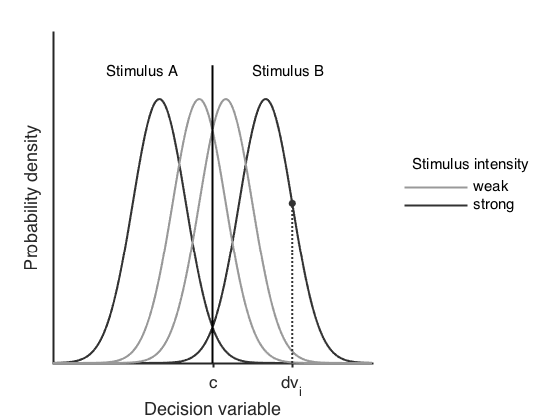

In [17]:
%% Show the basis of signal detection theory

% generate 4 distributions
stim = -0.6:0.001:0.6;
s1 = normpdf(stim, -.2, 0.1);
s2 = normpdf(stim,  .2, 0.1);
s3 = normpdf(stim, -.05, 0.1);
s4 = normpdf(stim,  .05, 0.1);

% plot those plus a criterion line in the middle
p = plot(stim, s1, stim, s2, stim, s3, stim, s4, zeros(1, 2), [0 4.5], 'k');

% two greys for different intensities of the stimulus
gr1 = [0.2 0.2 0.2];
gr2 = [0.6 0.6 0.6];

p(1).Color = gr1; p(2).Color = gr1;
p(3).Color = gr2; p(4).Color = gr2;

hold on; % one sample DV
plot(0.3, s2(dsearchn(stim', 0.3)), '.', ...
    'MarkerFaceColor', gr1, 'MarkerEdgeColor', gr1, 'MarkerSize', 10);
plot([0.3 0.3], [0 s2(dsearchn(stim', 0.3))], 'color', gr1, 'linestyle', ':');

% layout
axis tight; ylim([0 5]);
ylabel('Probability density'); xlabel('Decision variable');
text(-.4, 4.4, 'Stimulus A');
text(.15, 4.4, 'Stimulus B');

% add legend
l = legend([p(3), p(1)], 'weak', 'strong', 'Location', 'EastOutside');
l.Box = 'off';
text(0.75, 3, 'Stimulus intensity'); % legend title
set(gca, 'xtick', [0 0.3], 'xticklabel', {'c', 'dv_i'}, ...
    'box', 'off', 'tickdir', 'out', 'ytick', [], 'yticklabel', []);


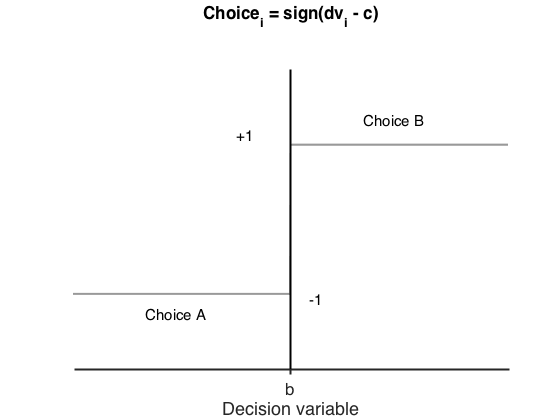

In [18]:
%% Choice = sign(dv - c)
s1 = sign(stim);
s1(s1==0) = 1;
p = plot(stim, s1, zeros(1, 2), [-2 2], 'k');
p(1).Color = [0.6 0.6 0.6];
axis tight; xlabel('Decision variable');
ylim([-2 2.5]);

set(gca, 'xtick', [0], 'xticklabel', {'b'}, ...
    'box', 'off', 'tickdir', 'out', 'ycolor', 'w');
text(-.4, -1.3, 'Choice A');
text(.05, -1.1, '-1');
text(.2, 1.3, 'Choice B');
text(-.15, 1.1, '+1');
title('Choice_i = sign(dv_i - c)');


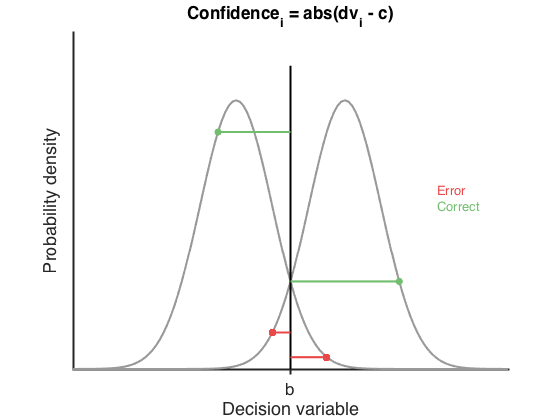

In [19]:
%% Confidence_i = abs(dv_i - c)

% red and green
cols = linspecer(3); cols = cols(2:3, :);

stim = -0.6:0.01:0.6;
s1 = normpdf(stim, -.15, 0.1);
s2 = normpdf(stim,  .15, 0.1);
clear p; p = plot(stim, s1, stim, s2, zeros(1, 2), [0 4.5], 'k');
p(1).Color = gr2; p(2).Color = gr2;
hold on;

% show a few points and their distance to the decision bound
% errors
plot([0.1 0], [s1(dsearchn(stim', 0.1)) s1(dsearchn(stim', 0.1))], 'color', cols(1,:));
plot(0.1, s1(dsearchn(stim', 0.1)), 's', ...
    'MarkerFaceColor',  cols(1,:), 'MarkerEdgeColor', cols(1,:), 'MarkerSize', 3);
plot([-.05 0], [s2(dsearchn(stim', -.05)) s2(dsearchn(stim', -.05))], 'color', cols(1,:));
plot(-.05, s2(dsearchn(stim', -.05)), 's', ...
    'MarkerFaceColor',  cols(1,:), 'MarkerEdgeColor', cols(1,:), 'MarkerSize', 3);

% correct trials
plot([-.2 0], [s1(dsearchn(stim', -.2)) s1(dsearchn(stim', -.2))], 'color', cols(2,:));
plot(-.2, s1(dsearchn(stim', -.2)), '.', ...
    'MarkerFaceColor', cols(2,:),  'MarkerEdgeColor', cols(2,:), 'MarkerSize', 10);
plot([.3 0], [s2(dsearchn(stim', .3)) s2(dsearchn(stim', .3))], 'color', cols(2,:));
plot(.3, s2(dsearchn(stim', .3)), '.', ...
    'MarkerFaceColor',  cols(2,:),  'MarkerEdgeColor', cols(2,:), 'MarkerSize', 10);

axis tight; ylim([0 5]); 
ylabel('Probability density'); xlabel('Decision variable');
set(gca, 'xtick', [0], 'xticklabel', {'b'}, ...
    'box', 'off', 'tickdir', 'out', 'ytick', []);
title('Confidence_i = abs(dv_i - c)');

hold on;
% add legend here for correct and error
thisax = gca;
ph2 = plot([-.2 -.15], mean(get(thisax, 'ylim'))*ones(2, 10), '.w');
lh = legend(ph2, 'Location', 'East'); % make t
lh.String = {'\color[rgb]{0.915294117647059,0.281568627450980,0.287843137254902} Error', ...
    '\color[rgb]{0.441568627450980,0.749019607843137,0.432156862745098} Correct'};
%lpos = get(lh, 'Position'); %lpos(1) = lpos(1) + .05;
set(lh, 'box', 'off', 'FontSize', 6);
